# 1/10 -  Basic plotting

In [ ]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

import matplotlib.pyplot as plt

# for interactive window, restart kernel if need to use this
%matplotlib widget 

In [ ]:
# Ages 18 to 55
ages_x = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]
# Median Python Developer Salaries by Age
py_dev_y = [20046, 17100, 20000, 24744, 30500, 37732, 41247, 45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640, 84666,
84392, 78254, 85000, 87038, 91991, 100000, 94796, 97962, 93302, 99240, 102736, 112285, 100771, 104708, 108423, 101407, 112542, 122870, 120000]
# Median JavaScript Developer Salaries by Age
js_dev_y = [16446, 16791, 18942, 21780, 25704, 29000, 34372, 37810, 43515, 46823, 49293, 53437, 56373, 62375, 66674, 68745, 68746, 74583, 79000,
78508, 79996, 80403, 83820, 88833, 91660, 87892, 96243, 90000, 99313, 91660, 102264, 100000, 100000, 91660, 99240, 108000, 105000, 104000]
# Median Developer Salaries by Age
dev_y = [17784, 16500, 18012, 20628, 25206, 30252, 34368, 38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752, 77232,
78000, 78508, 79536, 82488, 88935, 90000, 90056, 95000, 90000, 91633, 91660, 98150, 98964, 100000, 98988, 100000, 108923, 105000, 103117]

# plt.style.available - show all built-in styles
# plt.style.use('ggplot')

# plt.xkcd()

# line plot by default - use plt.bar, can use both line and bar in same plot
plt.plot(ages_x, py_dev_y, linewidth=3, label='Python') 
plt.plot(ages_x, js_dev_y, linewidth=3, label='JavaScript')
plt.plot(ages_x, dev_y, color='k', linestyle='--', marker='.', label='All Devs') 
# or plt.plot(x, y, 'k--.', label)
# can use 'black'/'#000'/'#000000' for color too
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) by Age')
plt.legend() # or plt.legend(['Python', 'JavaScript']) - overrides any labels
plt.grid(True)
plt.tight_layout() # for better padding
# plt.savefig('plot.png')
plt.show()

# 2/10 - Bar charts, CSV

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

plt.style.use("fivethirtyeight")

ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
x_indexes = np.arange(len(ages_x))
width = 0.25

dev_y = [38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752]
plt.bar(x_indexes-width, dev_y, width=width, color="#444444", label="All Devs")

py_dev_y = [45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640]
plt.bar(x_indexes, py_dev_y, width=width, color="#008fd5", label="Python")

js_dev_y = [37810, 43515, 46823, 49293, 53437, 56373, 62375, 66674, 68745, 68746, 74583]
plt.bar(x_indexes+width, js_dev_y, width=width, color="#e5ae38", label="JavaScript")

plt.title("Median Salary (USD) by Age")
plt.xlabel("Ages")
plt.ylabel("Median Salary (USD)")
plt.xticks(ticks=x_indexes, labels=ages_x)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import csv # for more: https://www.youtube.com/watch?v=q5uM4VKywbA
import pandas as pd
from collections import Counter

plt.style.use("fivethirtyeight")

language_counter = Counter()
use_pandas = False

if use_pandas is True:
    data = pd.read_csv('data.csv')
    ids = data['Responder_id']
    lang_responses = data['LanguagesWorkedWith']

    for response in lang_responses:
        language_counter.update(response.split(';'))
else:
    with open('data.csv') as csv_file: # context manager
        csv_reader = csv.DictReader(csv_file) # can access values by key instead of index
        # row = next(csv_reader) # get first row (keys are headers)
        # print(row, row['LanguagesWorkedWith'], row['LanguagesWorkedWith'].split(';'))

        for row in csv_reader:
            language_counter.update(row['LanguagesWorkedWith'].split(';'))

# print(language_counter)
# print(language_counter.most_common(5)) # 5 most common responses

# can do this one line using zip
languages = []
popularity = []
for item in language_counter.most_common(15):
    languages.append(item[0])
    popularity.append(item[1])

languages.reverse()
popularity.reverse()

plt.barh(languages, popularity)
plt.title("Most Popular Languages")
plt.xlabel("Number of People Who Use")
plt.tight_layout()
plt.show()

In [ ]:
c = Counter(['a', 'b'])
c.update(['c', 'a'])
c.update(['a','d','a','c'])
c

# 3/10 - Pie charts (proportion at a single point instant)

In [ ]:
# use for comparing small number of items (~5), not as many as in snippets.txt (use bar chart instead)

from matplotlib import pyplot as plt

plt.style.use("fivethirtyeight")

slices = [59219, 55466, 47544, 36443, 35917]
labels = ['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java']
# plt styles can automatically select colours, or you can specify hex values too
colors = ['blue', 'red', 'yellow', 'green', 'grey'] 
# for emphasising one slice - 0.1 = point of slice is 10% of radius further out
explode = [0, 0, 0, 0.1, 0] 

plt.pie(slices, 
labels=labels, 
colors=colors, 
explode=explode, 
shadow=True, # add shadow
startangle=90, # change rotation (good for making an edge vertical)
autopct='%1.1f%%', # add percentages in slices
wedgeprops={'edgecolor': 'black'} # for edges between slices
)
plt.title("My Awesome Pie Chart")
plt.tight_layout()
plt.show()

# Colors:
# Blue = #008fd5
# Red = #fc4f30
# Yellow = #e5ae37
# Green = #6d904f

# 4/10 - Stack plots / Area charts (proportions over a series of points)

In [ ]:
from matplotlib import pyplot as plt

plt.style.use("fivethirtyeight")

minutes = [1, 2, 3, 4, 5, 6, 7, 8, 9]
labels = ["Player 1", "Player 2", "Player 3"]
colors = ['#6d904f', '#fc4f30', '#008fd5']

# player1 = [1, 2, 3, 3, 4, 4, 4, 4, 5]
# player2 = [1, 1, 1, 1, 2, 2, 2, 3, 4]
# player3 = [1, 1, 1, 2, 2, 2, 3, 3, 3]

# data which has a constant total e.g. dev1 handing off project to dev2 and dev3 and tracking hours spent on project by each person
player1 = [8, 6, 5, 5, 4, 2, 1, 1, 0]
player2 = [0, 1, 2, 2, 2, 4, 4, 4, 4]
player3 = [0, 1, 1, 1, 2, 2, 3, 3, 4]

# # breakdown of points scored in first minute of the game
# plt.pie([player1[0], player2[0], player3[0]], labels=labels)

# can also input multi-dimensional arrays instead of 1xN lists
plt.stackplot(minutes, player1, player2, player3, labels=labels, colors=colors)

plt.title("My Awesome Stack Plot")
plt.tight_layout()
# change location to upper/lower left, can also input coordinates (origin at bottom left) 
# e.g. plt.legend(loc=(0.07, 0.05)) - put legend 7% and 5% from bottom corner
plt.legend(loc='lower left') 
plt.show()

# 5/10 - Filling line plots

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('dev_data.csv')
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']

plt.plot(ages, dev_salaries, color='#444444', linestyle='--', label='All Devs')
plt.plot(ages, py_salaries, label='Python')

# fill area under line plot
plt.fill_between(ages, 
py_salaries, dev_salaries, # fill between these two
where=(py_salaries > dev_salaries),
interpolate=True, # to make sure everything's filled correctly
color='green',
alpha=0.25, # opacity
label='Above Avg'
)

plt.fill_between(ages, 
py_salaries, dev_salaries,
where=(py_salaries <= dev_salaries),
interpolate=True, 
color='red', 
alpha=0.25, 
label='Below Avg'
)

plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
plt.plot(ages, dev_salaries, color='#444444', linestyle='--', label='All Devs')
plt.plot(ages, py_salaries, label='Python')

plt.fill_between(ages, py_salaries, alpha=0.25, label='Above Avg')

In [ ]:
plt.plot(ages, dev_salaries, color='#444444', linestyle='--', label='All Devs')
plt.plot(ages, py_salaries, label='Python')

overall_median = 57287
plt.fill_between(ages, py_salaries, overall_median, alpha=0.25, label='Above Avg')

In [ ]:
plt.plot(ages, dev_salaries, color='#444444', linestyle='--', label='All Devs')
plt.plot(ages, py_salaries, label='Python')

plt.fill_between(ages, 
py_salaries, overall_median, 
where=(py_salaries > overall_median),
interpolate=True,
color='green',
alpha=0.25,
)

plt.fill_between(ages, 
py_salaries, overall_median, 
where=(py_salaries <= overall_median),
interpolate=True,
color='red',
alpha=0.25,
)

# 6/10 - Histograms

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')

ages = [18, 19, 21, 25, 26, 26, 30, 32, 38, 45, 55]
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

data = pd.read_csv('histogram_data.csv')
ids = data['Responder_id']
ages = data['Age']

plt.hist(ages, 
bins=bins, # bins can be integer (will create that many bins) or list, can exclude certain ranges as well e.g. bins = [20, 30, ..., 100] will exclude ages < 20
edgecolor='black', # add edges between bins
log=True # to see very large and very small values on same plot
)

median_age = 29
color = '#fc4f30'
plt.axvline(median_age, color=color, label='Age Median', linewidth=2) # plot vertical line at median age

plt.title('Ages of Respondents')
plt.xlabel('Ages')
plt.ylabel('Total Respondents')
plt.tight_layout()
plt.legend()
plt.show()

# 7/10 - Scatter plots

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('seaborn')

x = [5, 7, 8, 5, 6, 7, 9, 2, 3, 4, 4, 4, 2, 6, 3, 6, 8, 6, 4, 1]
y = [7, 4, 3, 9, 1, 3, 2, 5, 2, 4, 8, 7, 1, 6, 4, 9, 7, 7, 5, 1]

plt.scatter(x, y, 
s=100, # size of markers
c='green', # colour of markers
#marker='x', # type of marker
edgecolor='black', # colour of edges of markers
linewidth=1, # thickness of edges of markers
alpha=0.75 # opacity of markers
)

In [ ]:
colors = [7, 5, 9, 7, 5, 7, 2, 5, 3, 7, 1, 2, 8, 1, 9, 2, 5, 6, 7, 5] # between 1 and 10 e.g. satisfaction rating

plt.scatter(x, y, 
s=100, 
c=colors, # colour assigned to each marker
edgecolor='black', 
linewidth=1,
alpha=0.75 
)

In [ ]:
colors = [7, 5, 9, 7, 5, 7, 2, 5, 3, 7, 1, 2, 8, 1, 9, 2, 5, 6, 7, 5]

plt.scatter(x, y, 
s=100, 
c=colors,
cmap='Greens', # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
edgecolor='black', 
linewidth=1,
alpha=0.75 
)

cbar = plt.colorbar()
cbar.set_label('Satisfaction')

In [ ]:
sizes = [209, 486, 381, 255, 191, 315, 185, 228, 174, 538, 239, 394, 399, 153, 273, 293, 436, 501, 397, 539]

plt.scatter(x, y, 
s=sizes, # change size of each marker
c=colors,
cmap='Greens', 
edgecolor='black', 
linewidth=1,
alpha=0.75 
)

cbar = plt.colorbar()
cbar.set_label('Satisfaction')

In [ ]:
data = pd.read_csv('scatter_data.csv')
view_count = data['view_count']
likes = data['likes']
ratio = data['ratio']

plt.scatter(view_count, likes, c=ratio, cmap='summer', edgecolor='black', linewidth=1, alpha=0.75)

# use log scales to show extreme data values better
plt.xscale('log')
plt.yscale('log')

cbar = plt.colorbar()
cbar.set_label('Like/Dislike Ratio')

plt.title('Trending YouTube Videos')
plt.xlabel('View Count')
plt.ylabel('Total Likes')
plt.tight_layout()
plt.show()

# 8/10 - Time-series data

In [ ]:
# datetime format codes: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
# datetime tutorial: https://www.youtube.com/watch?v=eirjjyP2qcQ

import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

plt.style.use('seaborn')

dates = [datetime(2019, 5, 24), datetime(2019, 5, 25), datetime(2019, 5, 26), datetime(2019, 5, 27), datetime(2019, 5, 28), datetime(2019, 5, 29), datetime(2019, 5, 30)]
y = [0, 1, 3, 4, 6, 5, 7]

plt.plot_date(dates, y,
linestyle='solid', # join markers with a line
marker=None # change marker (None = no marker)
)
plt.gcf().autofmt_xdate() # rotates dates, easier to read (gcf = get current figure)

date_format = mpl_dates.DateFormatter('%b, %d %Y') # to set formatting of date
plt.gca().xaxis.set_major_formatter(date_format) # to change formatting of date (gca = get current axis)


In [ ]:
data = pd.read_csv('time_series_data.csv')

convert = True
if convert:
    data['Date'] = pd.to_datetime(data['Date']) # convert string to date
    data.sort_values('Date', inplace=True) # don't need to do data = data.sort_values() if doing in place

price_date = data['Date']
price_close = data['Close']

plt.plot_date(price_date, price_close, linestyle='solid') # price_date read as string, not date
plt.gcf().autofmt_xdate()

plt.title('Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.tight_layout()
plt.show()

# 9/10 - Plotting live/real-time data

In [ ]:
import random
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

x_vals = [0, 1, 2, 3, 4, 5]
y_vals = [0, 1, 3, 2, 3, 5]

plt.plot(x_vals, y_vals)
plt.tight_layout()
plt.show()

In [ ]:
# use %matplotlib widget to see animation in notebook, otherwise run as .py
from matplotlib.animation import FuncAnimation

x_vals = []
y_vals = []

index = count() # counts up one number at a time

def animate(i):
    x_vals.append(next(index)) # get next value, sequential
    y_vals.append(random.randint(0, 5))
    plt.cla() # clear axis so multiple lines aren't created
    plt.plot(x_vals, y_vals) # plots brand new line each time but doesn't clear old lines -> multiple lines in plot stacked on each other, each a different colour

ani = FuncAnimation( # class plots values as they're added into x_vals and y_vals by animate
    plt.gcf(), # figure you want to animate
    animate, # function to run for animation
    interval=1000 # how often to run function (in ms), can change this depending on how often data is updated so you don't check more than you need to
    )

plt.tight_layout()
plt.show()

In [ ]:
# use %matplotlib widget to see animation in notebook, otherwise run as .py
import random
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def animate(i):
    data = pd.read_csv('live_data.csv')
    x = data['x_value']
    y1 = data['total_1']
    y2 = data['total_2']

    plt.cla() # clears legend too, need to add it back below

    plt.plot(x, y1, label='Channel 1')
    plt.plot(x, y2, label='Channel 2')

    plt.legend(loc='upper left')
    plt.tight_layout()

# run plt_live_data_gen.py in cmd before running this cell
ani = FuncAnimation(plt.gcf(), animate, interval=1000) # can set up stuff before animation runs by using init_func argument, or pass in more arguments to animate() using f_args

plt.tight_layout()
plt.show()

In [ ]:
# same as above but without clearing axes and just update lines on axes with the data
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

plt.style.use('fivethirtyeight')

x_vals = []
y_vals = []

plt.plot([], [], label='Channel 1')
plt.plot([], [], label='Channel 2')


def animate(i):
    data = pd.read_csv('live_data.csv')
    x = data['x_value']
    y1 = data['total_1']
    y2 = data['total_2']

    ax = plt.gca()
    line1, line2 = ax.lines

    line1.set_data(x, y1)
    line2.set_data(x, y2)

    xlim_low, xlim_high = ax.get_xlim()
    ylim_low, ylim_high = ax.get_ylim()

    ax.set_xlim(xlim_low, (x.max() + 5))

    y1max = y1.max()
    y2max = y2.max()
    current_ymax = y1max if (y1max > y2max) else y2max

    y1min = y1.min()
    y2min = y2.min()
    current_ymin = y1min if (y1min < y2min) else y2min

    ax.set_ylim((current_ymin - 5), (current_ymax + 5))


ani = FuncAnimation(plt.gcf(), animate, interval=1000)

plt.legend()
plt.tight_layout()
plt.show()

# 10/10 - Subplots

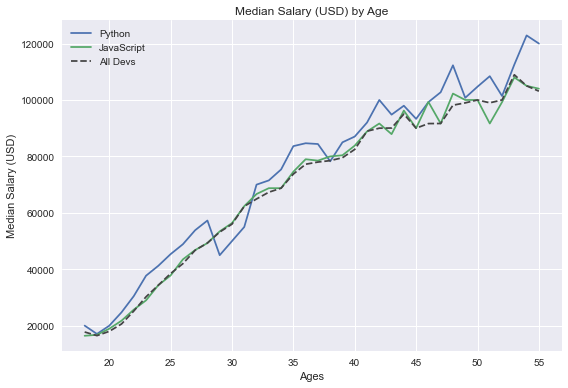

In [4]:
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('seaborn')

data = pd.read_csv('dev_data.csv')
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']

plt.plot(ages, py_salaries, label='Python')
plt.plot(ages, js_salaries, label='JavaScript')
plt.plot(ages, dev_salaries, color='#444444', linestyle='--', label='All Devs')

plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.tight_layout()
plt.legend()
plt.show()

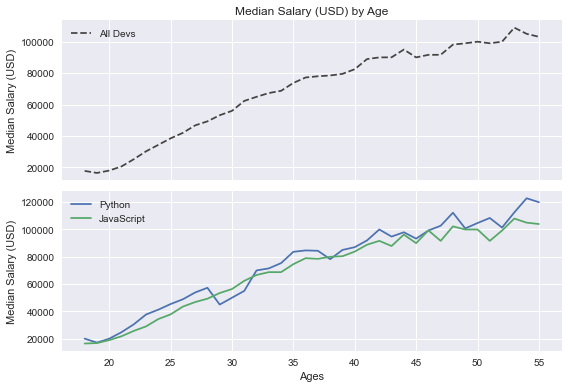

In [9]:
# fig, ax = plt.subplots(nrows=2, ncols=1) # can specify how many axes you want in same figure
# print(ax) # returns a list

# same way as above but unpacking ax
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,
sharex=True, # if you want to label only bottom-most ticks
sharey=True # if you want to label only left-most ticks
)

ax1.plot(ages, dev_salaries, color='#444444', linestyle='--', label='All Devs')
ax2.plot(ages, py_salaries, label='Python')
ax2.plot(ages, js_salaries, label='JavaScript')

ax1.legend()
ax1.set_title('Median Salary (USD) by Age')
ax1.set_ylabel('Median Salary (USD)')

ax2.legend()
ax2.set_xlabel('Ages')
ax2.set_ylabel('Median Salary (USD)')

# fig1.savefig('fig1.png')
# fig2.savefig('fig2.png')

plt.tight_layout()
plt.show()

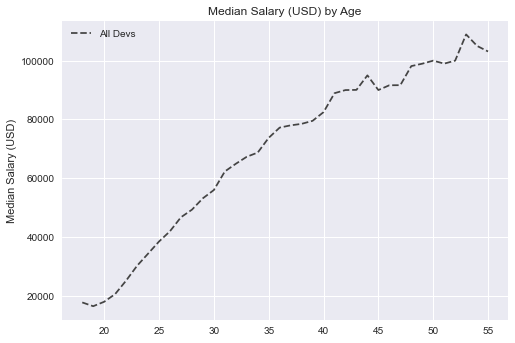

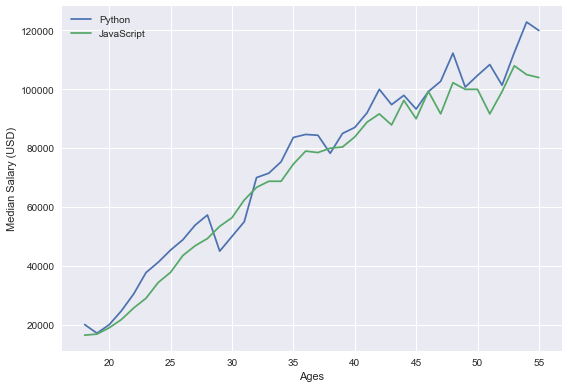

In [10]:
# figure = container holding plots, axes = actual plots
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

ax1.plot(ages, dev_salaries, color='#444444', linestyle='--', label='All Devs')
ax2.plot(ages, py_salaries, label='Python')
ax2.plot(ages, js_salaries, label='JavaScript')

ax1.legend()
ax1.set_title('Median Salary (USD) by Age')
ax1.set_ylabel('Median Salary (USD)')

ax2.legend()
ax2.set_xlabel('Ages')
ax2.set_ylabel('Median Salary (USD)')

fig1.savefig('fig1.png')
fig2.savefig('fig2.png')

plt.tight_layout()
plt.show()